In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [6]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
X = df.iloc[:,:-1]
y = df['Rings']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [26]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)
r2_score = []
for i in range(1,51):
    rfr_cv_score = cross_val_score(RandomForestRegressor(n_estimators=i, random_state=1), X, y, cv=cv, scoring='r2').mean()
    r2_score.append(rfr_cv_score)

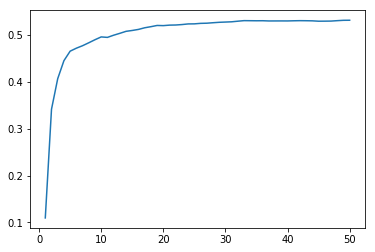

In [27]:
plt.plot(range(1,51), r2_score)

In [28]:
for idx, score in enumerate(r2_score):
    if score > 0.52:
        print(idx+1)
        break

21
